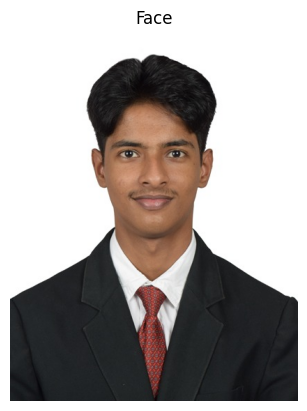

No alpha channel found. Converting white to transparent...
Resized sunglasses shape: (71, 178, 4)


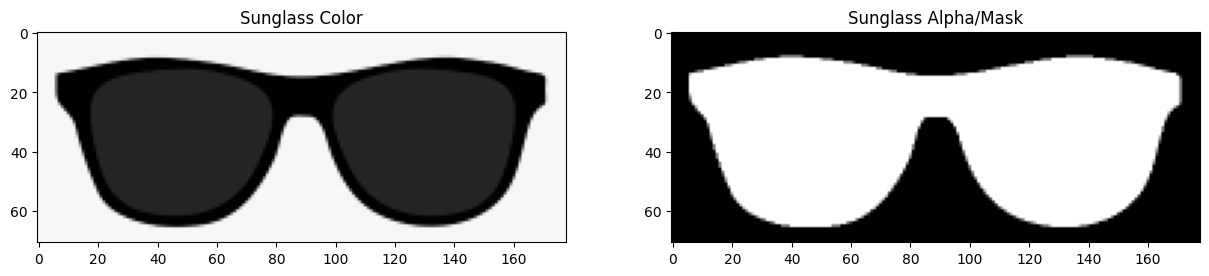

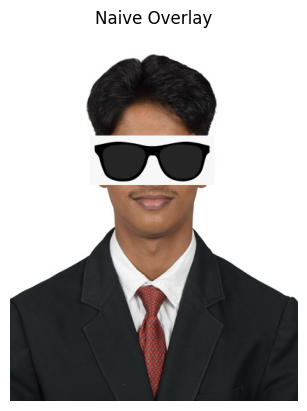

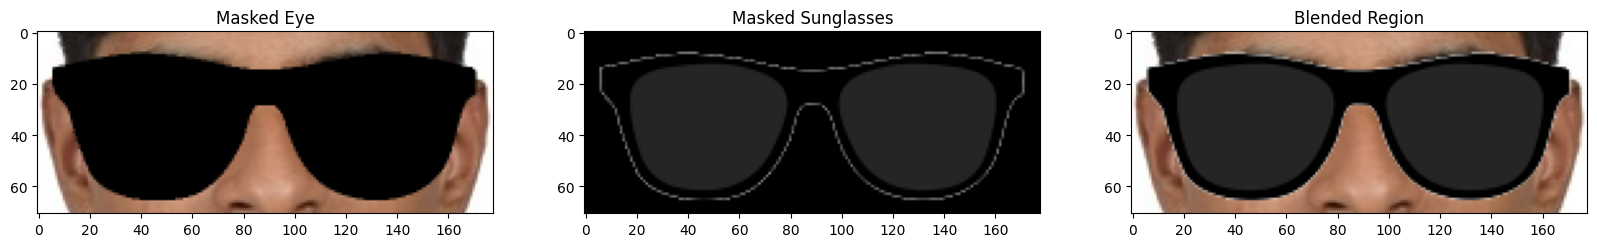

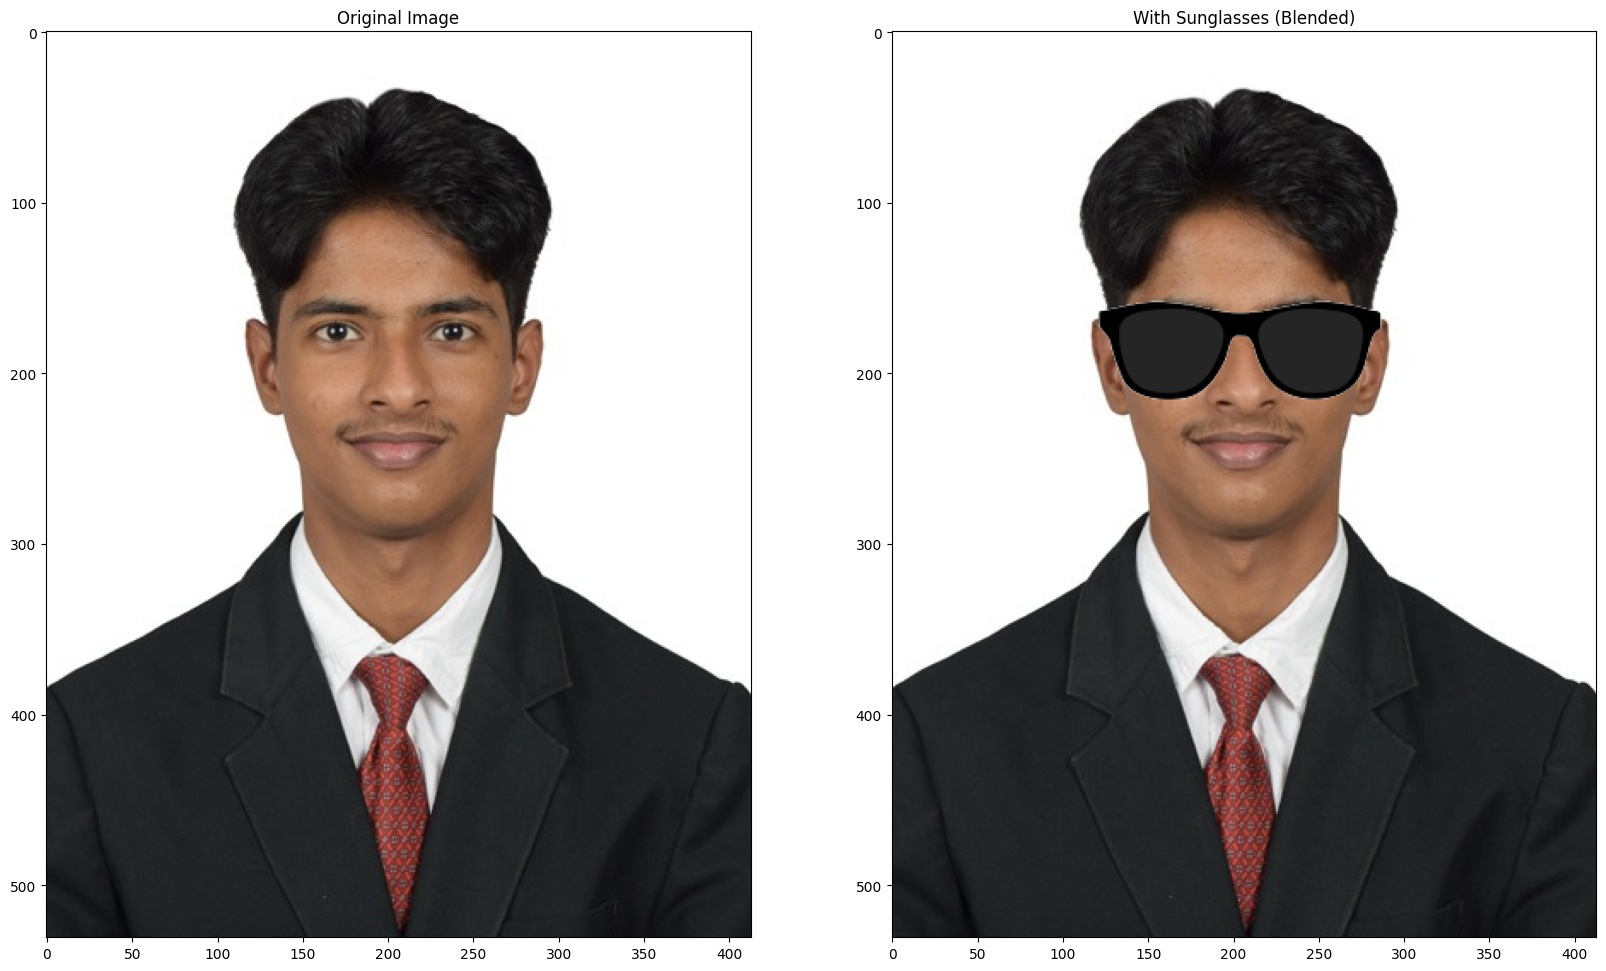

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load face image
faceImage = cv2.imread('naveen.jpg')
plt.imshow(faceImage[:, :, ::-1]); plt.title("Face")
plt.axis('off'); plt.show()

# Face image size
face_h, face_w = faceImage.shape[:2]

# Load sunglasses image (with alpha if available)
glassPNG = cv2.imread('sunglasses.png', cv2.IMREAD_UNCHANGED)

# If sunglasses image has no alpha, make white background transparent
if glassPNG.shape[2] == 3:
    print("No alpha channel found. Converting white to transparent...")
    glassPNG = cv2.cvtColor(glassPNG, cv2.COLOR_BGR2BGRA)
    white_mask = np.all(glassPNG[:, :, :3] >= [240, 240, 240], axis=2)
    glassPNG[white_mask, 3] = 0

# Resize sunglasses using a scale factor
scale = 0.5  # Try changing this to 0.3, 0.8, 1.2, etc.
glassPNG = cv2.resize(glassPNG, (0, 0), fx=scale, fy=scale)
print("Resized sunglasses shape:", glassPNG.shape)

# Manual position to place sunglasses
y, x = 150, 115

# Size of sunglasses
h, w = glassPNG.shape[:2]

# Check bounds
if y + h > face_h or x + w > face_w:
    print("Warning: Sunglasses go out of image bounds. Adjust size or position.")

# Split channels
glassBGR = glassPNG[:, :, :3]
glassMask1 = glassPNG[:, :, 3]
glassMask = cv2.merge([glassMask1] * 3) / 255.0

# Display sunglasses and mask
plt.figure(figsize=[15, 15])
plt.subplot(121); plt.imshow(glassBGR[:, :, ::-1]); plt.title('Sunglass Color')
plt.subplot(122); plt.imshow(glassMask1, cmap='gray'); plt.title('Sunglass Alpha/Mask')
plt.show()

# Naive overlay (without blending)
faceWithGlassesNaive = faceImage.copy()
faceWithGlassesNaive[y:y+h, x:x+w] = glassBGR
plt.imshow(faceWithGlassesNaive[..., ::-1]); plt.title("Naive Overlay")
plt.axis('off'); plt.show()

# Alpha blending
faceWithGlassesArithmetic = faceImage.copy()
eyeROI = faceWithGlassesArithmetic[y:y+h, x:x+w].astype(float)
maskedEye = cv2.multiply(eyeROI, 1 - glassMask)
maskedGlass = cv2.multiply(glassBGR.astype(float), glassMask)
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)
eyeRoiFinal = np.uint8(eyeRoiFinal)

# Show blending steps
plt.figure(figsize=[20, 20])
plt.subplot(131); plt.imshow(np.uint8(maskedEye)[..., ::-1]); plt.title("Masked Eye")
plt.subplot(132); plt.imshow(np.uint8(maskedGlass)[..., ::-1]); plt.title("Masked Sunglasses")
plt.subplot(133); plt.imshow(eyeRoiFinal[..., ::-1]); plt.title("Blended Region")
plt.show()

# Final placement
faceWithGlassesArithmetic[y:y+h, x:x+w] = eyeRoiFinal

# Show final result
plt.figure(figsize=[20, 20])
plt.subplot(121); plt.imshow(faceImage[:, :, ::-1]); plt.title("Original Image")
plt.subplot(122); plt.imshow(faceWithGlassesArithmetic[:, :, ::-1]); plt.title("With Sunglasses (Blended)")
plt.show()
